In [4]:
import os
import json
import re
import string
import random
import time
import datetime

import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

from argparse import Namespace
from tqdm import tqdm

import matplotlib.pyplot as plt 

from transformers import AutoTokenizer, AutoModelForSequenceClassification


/home/jz75/Documents/2023-2024/SH-Project/CS4099-LegalNLP/pytorchenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Pre-process LEDGAR DATA 

In [2]:
filepath = './raw_data/summary_data/LEDGAR_2016-2019_clean.jsonl'

In [7]:
df = pd.read_json(filepath, lines=True)


In [8]:
df.head(
)

,provision,label,source
0,Section and Subsection headings in this Amendm...,[headings],2019/QTR1/000119312519044328/d691151dex101.htm
1,THIS AMENDMENT AND THE RIGHTS AND OBLIGATIONS ...,[applicable laws],2019/QTR1/000119312519044328/d691151dex101.htm
2,This Amendment may be executed in any number o...,[counterparts],2019/QTR1/000119312519044328/d691151dex101.htm
3,The execution and delivery of this Amendment b...,[binding effects],2019/QTR1/000119312519044328/d691151dex101.htm
4,Each of the parties hereto irrevocably waives ...,[waiver of jury trials],2019/QTR1/000119312519044328/d691151dex101.htm


In [12]:
df.columns

Index(['provision', 'label', 'source'], dtype='object')

In [10]:
tokenizer = AutoTokenizer.from_pretrained('casehold/legalbert')

828198


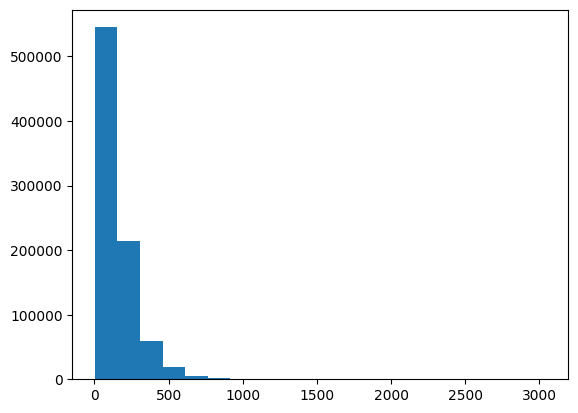

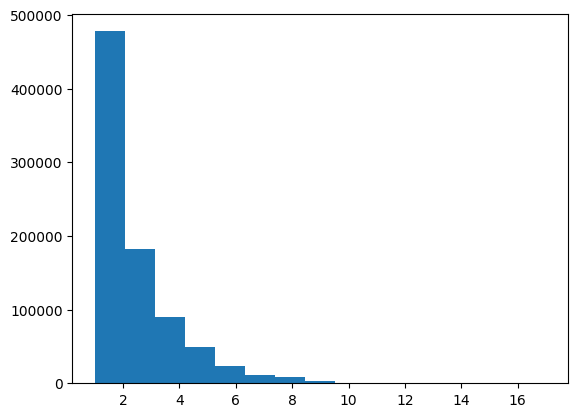

In [17]:
lengths1 = []
lengths2 = []
count = 0
for idx, row in df.iterrows():
    tokens1 = tokenizer.tokenize(row['provision'])
    tokens2 = tokenizer.tokenize(row['label'][0])
    lengths1.append(len(tokens1))
    lengths2.append(len(tokens2))
    if len(tokens1) <= 512 and len(tokens2) <= 512:
        count += 1


print(count)


plt.hist(lengths1, bins=20)
plt.show()

plt.hist(lengths2, bins=15)
plt.show()

# Pre-process privacy Q/A 


In [46]:
with open(filepath, 'r') as file:
    json_data = json.load(file)

df = pd.DataFrame.from_dict(json_data, orient='index')
df.reset_index(inplace=True)
df.rename(columns={'index': 'id'}, inplace=True)

JSONDecodeError: Extra data: line 2 column 1 (char 9189)

In [39]:
df.head()

,id,case_code,case_text,doc,note,original_text,reference_summary,title_code,title_text,uid,urls,tldr_code,tldr_text
0,tosdr001,"1,s",This service does not track you,Privacy Policy,,search encrypt does not track search history i...,this service does not track you.,"2,s",no tracking,tosdr001,{'searchencrypt.com'},NaN,NaN
1,tosdr003,"2,s",The copyright license that users grant to the ...,Additional Terms of Service,,rvices you grant oath the following worldwide ...,the copyright license granted to yahoo for pho...,"3,d","Yahoo's copyright license for photos, graphics...",tosdr003,{'flickr.com'},1,The copyright license granted to Yahoo for pho...
2,tosdr005,"1,s",The service uses your personal data to employ ...,Privacy Policy,,it also enables us to serve you advertising an...,the service uses your personal data to employ ...,"2,d",targeted third-party advertising,tosdr005,{'academia.edu'},NaN,NaN
3,tosdr008,"2,s",This service does not sell your personal data,Privacy / Terms,,no sale of personal information librarything w...,librarything will not sell or give personally ...,3,Will not sell your data,tosdr008,{'librarything.com'},1,LibraryThing will not sell or give personally-...
4,tosdr016,"1,d",The service provides details about what kinds ...,Privacy Policy,not a summary,i don t store any personally identifiable data...,the service provides details about what kinds ...,NaN,NaN,tosdr016,{'r3bl.me'},NaN,NaN


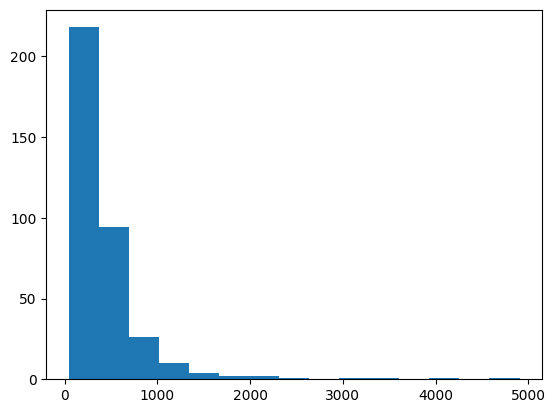

In [40]:
lengths = []

for idx, row in df.iterrows():
    lengths.append(len(row.loc['original_text']))

plt.hist(lengths, bins = 15)
plt.show()


In [41]:
print(len(df))

361


In [30]:
df = pd.read_csv('./raw_data/privacy_policy/policy_train_data.csv', sep='\t')

In [31]:
df.head()

,Folder,DocID,QueryID,SentID,Split,Query,Segment,Label
0,../../Dataset/Train/com.cake.browser,Cake Web Browser _1,Cake Web Browser _1_0,Cake Web Browser _1_0_0,train,do you keep the data of mine and upload to you...,"This privacy policy, with our Terms of Servic...",Irrelevant
1,../../Dataset/Train/com.cake.browser,Cake Web Browser _1,Cake Web Browser _1_0,Cake Web Browser _1_0_1,train,do you keep the data of mine and upload to you...,We encourage you to read this privacy policy c...,Irrelevant
2,../../Dataset/Train/com.cake.browser,Cake Web Browser _1,Cake Web Browser _1_0,Cake Web Browser _1_0_2,train,do you keep the data of mine and upload to you...,By using our application or other online servi...,Irrelevant
3,../../Dataset/Train/com.cake.browser,Cake Web Browser _1,Cake Web Browser _1_0,Cake Web Browser _1_0_3,train,do you keep the data of mine and upload to you...,"When we post changes to this privacy policy, ...",Irrelevant
4,../../Dataset/Train/com.cake.browser,Cake Web Browser _1,Cake Web Browser _1_0,Cake Web Browser _1_0_4,train,do you keep the data of mine and upload to you...,We encourage you to review this privacy policy...,Irrelevant


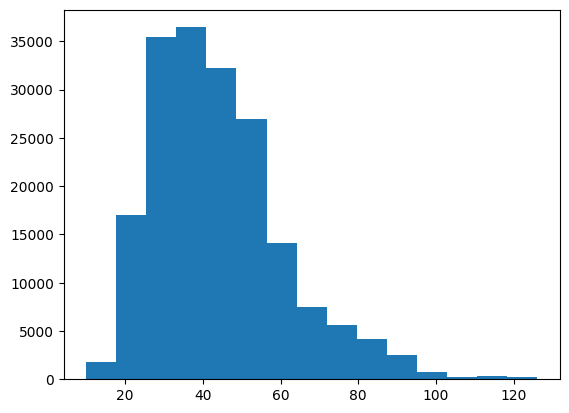

In [34]:
lengths = []
for idx, row in df.iterrows():
    lengths.append(len(row['Query']))

plt.hist(lengths, bins=15)
plt.show()

In [35]:
print(len(df))

185200
